## HW 6

## Solution 7.1

In [4]:
## 1:
import os

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap, BoundaryNorm
import seaborn as sns
import rioxarray as rxr
import xarray as xr
import geopandas as gpd
from shapely.geometry import mapping
import pandas as pd

In [6]:
path1 = os.path.join("data","2023-02-22-sentinel-2-red-band.tiff")
path2 = os.path.join("data","2023-02-22-sentinel-2-NIR-band.tiff")

In [7]:
ar1 = rxr.open_rasterio(path1, masked=True).squeeze()
ar2 = rxr.open_rasterio(path2, masked=True).squeeze()

In [11]:
ar1

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [27]:
print("Is the spatial extent the same?",
      ar1.rio.bounds() == ar2.rio.bounds())

print("Is the resolution the same?",
      ar1.rio.resolution() == ar2.rio.resolution())

Is the spatial extent the same? True
Is the resolution the same? True


In [25]:
print("CRS 1: ", ar1.rio.crs)
print("CRS 2: ", ar2.rio.crs)

CRS 1:  EPSG:4326
CRS 2:  EPSG:4326


Why? : masking is how we deal with unwanted or invalid data

2:

Calculate the NDVI:
$NDVI = \frac{NIR - R}{NIR + R} $

In [42]:
ndvi = (ar2 - ar1)/(ar2 + ar1)

In [51]:
my_path = os.path.join("data", "2023-02-22-sentinel-2-NDVI.tiff")
my_path

'data/2023-02-22-sentinel-2-NDVI.tiff'

In [52]:
# Export data to geotiff
ndvi.rio.to_raster(my_path)

In [53]:
ndvi = rxr.open_rasterio(my_path, masked=True).squeeze()
ndvi

<xarray.DataArray (y: 140, x: 159)>
[22260 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 -118.4 -118.4 -118.4 ... -118.4 -118.4 -118.4
  * y            (y) float64 33.98 33.97 33.97 33.97 ... 33.96 33.96 33.96 33.96
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:  Area
    scale_factor:   1.0
    add_offset:     0.0

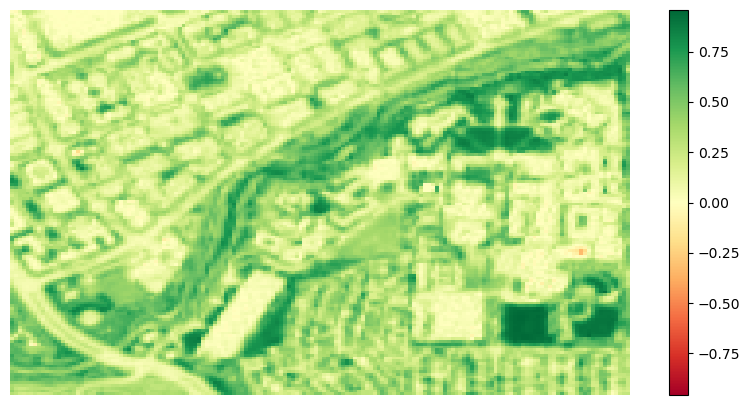

In [54]:
# Plot the data
f, ax = plt.subplots(figsize=(10, 5))
ndvi.plot(cmap="RdYlGn")
ax.set(title="")
ax.set_axis_off()
plt.show()

Patterns: In general there is not a lot of vegetation. You can tell where buildings and roads are because they are very light yellow. You can also clearly see where the river is leading to the Ballona Estuary.

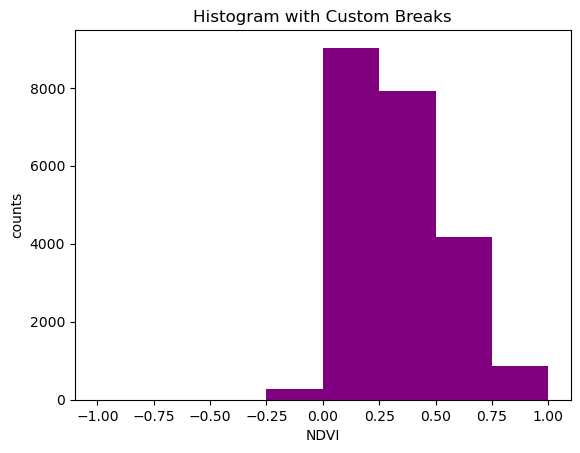

In [60]:
# Histogram with custom breaks
f, ax = plt.subplots()
ndvi.plot.hist(color="purple",
                        bins=[-1, -0.75, -0.5, -0.25, 0, 0.25, 0.5, 0.75, 1])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI",
       ylabel="counts")

plt.show()

In [63]:
print("max NVDI: ", np.max(np.array(ndvi)))
print("min NVDI: ", np.min(np.array(ndvi)))

max NVDI:  0.95758915
min NVDI:  -0.3420191


Patterns: The majority of counts are within the 0 - 0.25 NDVI range. The least amount of counts are below 0.

## Solution for 7.2

In [98]:
class_bins = [-np.inf, 0, 0.2, 0.5, np.inf]
class_bins

[-inf, 0, 0.2, 0.5, inf]

In [99]:
ndvi_class = xr.apply_ufunc(np.digitize,
                                     ndvi,
                                     class_bins)

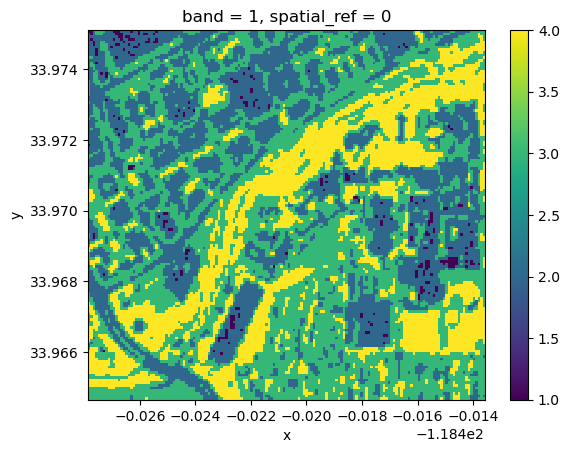

In [100]:
im = ndvi_class.plot.imshow()
ax.set_axis_off()

Observations: This map gives a more detailed picture of vegetation. It does well showing the outlines of buildings and roads in blue and purple, but it seems like it may be confusing something else for vegetation because there is not that much on campus and in the surrounding area. Maybe it's confusing sidewalks for vegetation also?

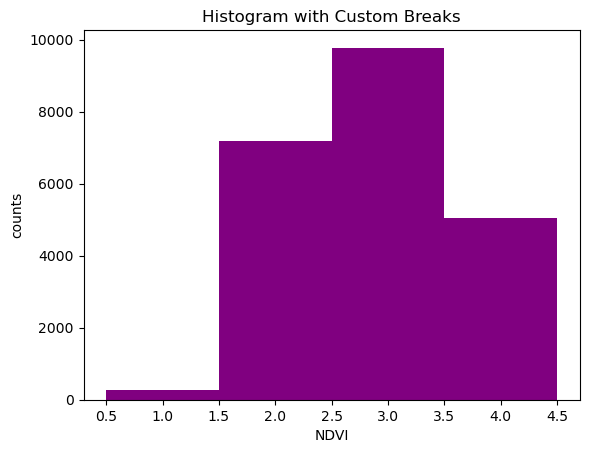

In [109]:
# Histogram with custom breaks
f, ax = plt.subplots()
ndvi_class.plot.hist(color="purple",bins = [0.5, 1.5, 2.5, 3.5, 4.5])
ax.set(title="Histogram with Custom Breaks",
       xlabel="NDVI",
       ylabel="counts")

plt.show()

In [118]:
counts = np.array([ 272., 7172., 9775., 5041.])

In [119]:
counts/(np.sum(counts))

array([0.01221923, 0.32219227, 0.43912848, 0.22646002])

Class 1 is roughly 1%, Class 2 is 32%, Class 3 is 44%, and Class 4 is 23%